In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:

df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

,DAY,PRECIP_QUANTITY,year,year_month,month
0,1892-01-01,1.94,1892,1892-01,1
1,1892-01-02,0.49,1892,1892-01,1
2,1892-01-03,0.00,1892,1892-01,1
3,1892-01-04,0.00,1892,1892-01,1
4,1892-01-05,0.87,1892,1892-01,1


In [5]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()


,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


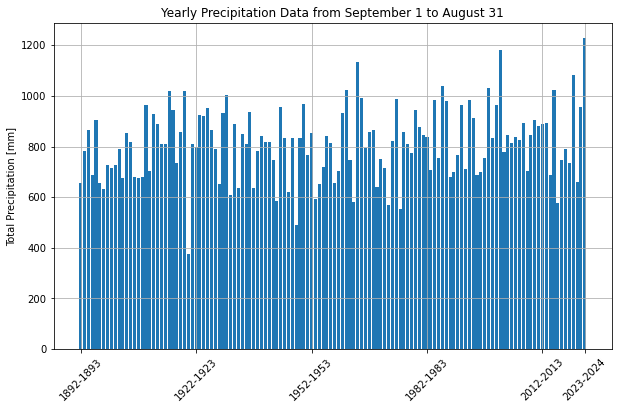

In [4]:
#plot as a bar plot the total precipitation of the season of every year
years = tp_seasonal_year['season'].unique()
years.sort()

# Select every 50th year and the last year
selected_years = list(years[::30])
selected_years.append(years[-1])


plt.figure(figsize=(10, 6))
plt.bar(tp_seasonal_year['season'], tp_seasonal_year['TP'], label='Total Precipitation')
plt.ylabel('Total Precipitation [mm]')
plt.title('Yearly Precipitation Data from September 1 to August 31')
plt.grid()
#z = np.polyfit(years, historic_precipitation, 1)
#p = np.poly1d(z)
#plt.plot(years, p(years), "r--", label='Trendline')
plt.xticks(selected_years, rotation=45)

plt.show()
